<a href="https://colab.research.google.com/github/Matheus-SF/eda_engineering-student/blob/main/EDA_Engineering_Student_Journey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Sobre a base de dados

https://www.kaggle.com/datasets/rakeshkapilavai/engineering-student-journey

Este conjunto de dados oferece uma visão abrangente da jornada acadêmica e profissional de estudantes de engenharia. Inclui informações demográficas (idade, gênero), desempenho acadêmico (GPA por semestre e média), participação em atividades extracurriculares (clubes e hard skills), histórico de estágios, domínios de estágio e de colocação, status de emprego pós-formatura e pacote salarial (CTC em LPA) .

Com 2.000 registros, a base permite analisar:

Evolução do desempenho acadêmico ao longo dos semestres.

Relações entre GPA, estágio, habilidades técnicas e empregabilidade.

Variações salariais conforme curso, clubes, experiência de estágio e hard skills.

Padrões de empregabilidade e trajetórias profissionais pós-graduação.

Este dataset é ideal para explorar correlações e insights em áreas como educação, empregabilidade e desenvolvimento profissional de engenheiros.

## Método EDA
A análise exploratória foi conduzida de forma sistemática para entender os padrões, relações e possíveis fatores que influenciam o sucesso acadêmico e profissional dos estudantes de engenharia. Inicialmente, realizei uma inspeção de valores ausentes e limpeza de dados, incluindo filtragem condicional para variáveis como "CTC (LPA)" e tratamento de colunas com múltiplos valores (ex: clubes e skills), que foram devidamente "explodidas" para análise granular.

Utilizei boxplots para detecção de outliers, histogramas e gráficos de dispersão para avaliar distribuições e correlações. A matriz de correlação revelou que os GPAs entre si possuem alta correlação, mas outras variáveis têm correlação fraca com o CTC. Gráficos de barras foram aplicados para identificar quais combinações de clubes e hard skills estão associadas a melhores salários. Também avaliei a taxa de empregabilidade em relação a gênero, idade, domínio de estágio e outras variáveis qualitativas.

Essa abordagem permitiu levantar hipóteses sólidas e explorar interações relevantes entre variáveis acadêmicas e profissionais.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
base = pd.read_csv('students.csv')

In [10]:
base.head()

,Student ID,Name,Age,Gender,Branch,Average GPA,Backlogs,Attendance (%),Clubs,Skills,...,CTC (LPA),Alumni Path,Sem1 GPA,Sem2 GPA,Sem3 GPA,Sem4 GPA,Sem5 GPA,Sem6 GPA,Sem7 GPA,Sem8 GPA
0,b37412a3-fa5c-40ca-b087-7109a47482d7,Amit,21.0,Male,MECH,6.99,0.0,70.45,"Literary Society, Robotics","C++, Machine Learning, Python, Java",...,0.00,NaN,8.34,5.24,6.06,7.81,7.18,7.04,8.26,5.99
1,65001423-faeb-4d19-a550-8ea26133a34d,Tina Ballard,19.0,Male,ECE,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",...,0.00,NaN,7.37,6.37,6.45,5.99,6.55,6.99,6.46,5.52
2,228aaf1d-8710-4c8d-bfec-001b0df01f34,Meena,19.0,Female,CIVIL,7.08,0.0,84.79,Literary Society,"Data Science, SQL, Machine Learning",...,0.00,NaN,5.79,8.82,7.03,6.92,7.67,6.01,7.75,6.62
3,1aa67474-e200-4157-ad54-c95aaa4d52a8,Christopher Morales,23.0,Male,ECE,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",...,5.89,Research,7.90,4.26,8.19,7.52,8.32,6.80,4.94,7.43
4,5122db4a-14c8-44d7-b2f4-e869f69d3dd7,Siddharth,20.0,Male,EEE,7.09,0.0,97.12,Robotics,"C++, SQL, Java, Python",...,0.00,NaN,6.86,6.24,7.64,7.15,5.91,6.18,8.19,8.54


##Sumário

| Variável              | Descrição                                          | Tipo       | Categoria       |
| --------------------- | -------------------------------------------------- | ---------- | --------------- |
| `Student ID`          | Identificador único de cada aluno (UUID)           | String     | Identificador   |
| `Name`                | Nome do estudante (anonimizado)                    | String     | Identificador   |
| `Age`                 | Idade do estudante                                 | Integer    | Numérica        |
| `Gender`              | Gênero do estudante (Male/Female)                  | Categórica | Demográfica     |
| `Branch`              | Curso acadêmico (e.g., CSE, ECE, MECH)             | Categórica | Acadêmica       |
| `Average GPA`         | Média geral de GPA (0-10)                          | Float      | Numérica        |
| `Backlogs`            | Número de reprovações                              | Integer    | Acadêmica       |
| `Attendance (%)`      | Porcentagem de presença nas aulas                  | Float      | Acadêmica       |
| `Clubs`               | Clubes extracurriculares (e.g., Robotics, Coding)  | String     | Extracurricular |
| `Skills`              | Habilidades técnicas (e.g., Python, ML)            | String     | Técnica         |
| `Internship Done`     | Fez estágio? (Yes/No)                              | Categórica | Profissional    |
| `Internship Domain`   | Área de estágio (e.g., Software, Research)         | Categórica | Profissional    |
| `Placement Status`    | Foi contratado? (Placed/Not Placed)                | Categórica | Resultado       |
| `Placement Domain`    | Área de contratação (e.g., Software, Core Eng.)    | Categórica | Resultado       |
| `CTC (LPA)`           | Salário anual em LPA (0 se não foi contratado)     | Float      | Resultado       |
| `Alumni Path`         | Caminho após graduação (e.g., Job, Higher Studies) | Categórica | Pós-graduação   |
| `Sem1 GPA - Sem8 GPA` | GPA por semestre (0-10)                            | Float      | Acadêmica       |


##Perguntas:
1. Quais cursos possuem maior média de GPA?
2. Alunos com mais presença na aula possuem maior GPA?
3. Estudantes com certas habilidades possuem maior salário(CTC)?
4. Qual a porcentagem de alunos que conseguem emprego após a formação?


##Análise da Base

In [13]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         1999 non-null   object 
 1   Name               2000 non-null   object 
 2   Age                1999 non-null   float64
 3   Gender             1999 non-null   object 
 4   Branch             1999 non-null   object 
 5   Average GPA        1999 non-null   float64
 6   Backlogs           1999 non-null   float64
 7   Attendance (%)     1999 non-null   float64
 8   Clubs              1999 non-null   object 
 9   Skills             1999 non-null   object 
 10  Internship Done    1999 non-null   object 
 11  Internship Domain  982 non-null    object 
 12  Placement Status   1999 non-null   object 
 13  Placement Domain   1032 non-null   object 
 14  CTC (LPA)          1999 non-null   float64
 15  Alumni Path        1032 non-null   object 
 16  Sem1 GPA           1999 

In [14]:
base.describe()

,Age,Average GPA,Backlogs,Attendance (%),CTC (LPA),Sem1 GPA,Sem2 GPA,Sem3 GPA,Sem4 GPA,Sem5 GPA,Sem6 GPA,Sem7 GPA,Sem8 GPA
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.00000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,20.474237,7.002616,0.966983,78.933147,5.795898,6.976433,7.08021,6.980905,6.961736,7.037894,6.939355,6.990310,7.054812
std,1.728062,0.341148,0.990905,11.730931,6.563695,0.966329,1.03160,0.985273,0.983697,0.984407,0.954357,1.018425,1.032945
min,18.000000,6.050000,0.000000,60.040000,0.000000,4.000000,4.10000,4.000000,4.000000,4.000000,4.150000,4.000000,4.000000
25%,19.000000,6.770000,0.000000,69.000000,0.000000,6.330000,6.39000,6.280000,6.275000,6.370000,6.270000,6.300000,6.355000
50%,21.000000,7.000000,1.000000,78.310000,3.460000,6.980000,7.09000,6.940000,6.910000,7.030000,6.930000,6.970000,7.110000
75%,22.000000,7.215000,1.000000,89.220000,11.260000,7.670000,7.82000,7.630000,7.640000,7.685000,7.575000,7.700000,7.765000
max,23.000000,8.070000,5.000000,99.980000,19.990000,10.000000,10.00000,10.000000,9.630000,9.780000,10.000000,9.920000,10.000000


##Tabela de Classificação CTC:
| Faixa de CTC (LPA) | Categoria    | Descrição                                                                |
| ------------------ | ------------ | ------------------------------------------------------------------------ |
| `0`                | Não colocado | Estudante ainda não foi contratado.                                      |
| `0.1 – 3.0`        | Baixo        | Salário geralmente oferecido por startups pequenas ou empresas locais.   |
| `3.1 – 6.0`        | Médio        | Faixa padrão para empresas médias ou posições de entrada em MNCs.        |
| `6.1 – 10.0`       | Bom          | Ofertas de empresas consolidadas, techs e posições mais competitivas.    |
| `10.1 – 20.0`      | Excelente    | Salários altos para recém-formados, geralmente empresas top tier.        |
| `> 20.0`           | Elite        | Muito acima da média; indica ofertas excepcionais (ex: FAANG, FinTechs). |


In [18]:
base["Branch"].value_counts()

,count
Branch,
MECH,353
CIVIL,352
IT,342
EEE,337
ECE,323
CSE,292


## Cursos:
MECH – Engenharia Mecânica

CIVIL – Engenharia Civil

IT – Tecnologia da Informação

EEE – Engenharia Elétrica e Eletrônica

ECE – Engenharia Eletrônica e de Comunicação

CSE – Ciência da Computação

In [21]:
base["Internship Domain"].value_counts()

,count
Internship Domain,
Research,207
Higher Studies,184
Consulting,171
Software,147
Core Engineering,147
Hardware,126


##Observações até o momento:
1. É possível notar que para as perguntas levantadas a respeito da base de dados, colunas como nome do estudante e seu ID são irrelevantes para a análise de dados que será executada, portanto estes dados serão removidos na próxima etapa
2. As colunas 'Internship Domain' e 'Alumni Path' apresentam diversos valores nulos, o que implica na necessidade de um tratamento mais robusto posteriormente.
3. Analisando os quartes do CTC, conclui-se que o mesmo possui uma assimetria forte que pode enviesar a análise




## Limpeza de Dados

In [22]:
base1 = base.copy()#criação de uma cópia do dataframe original antes de prosseguir com a limpeza


In [30]:
base1.columns = base1.columns.str.strip()  # Remove espaços nas bordas
base1 = base1.drop(["Student ID", "Name"], axis=1) #Remoção das colunas indesejadas


In [34]:
base1.head()


,Age,Gender,Branch,Average GPA,Backlogs,Attendance (%),Clubs,Skills,Internship Done,Internship Domain,...,CTC (LPA),Alumni Path,Sem1 GPA,Sem2 GPA,Sem3 GPA,Sem4 GPA,Sem5 GPA,Sem6 GPA,Sem7 GPA,Sem8 GPA
0,21.0,Male,MECH,6.99,0.0,70.45,"Literary Society, Robotics","C++, Machine Learning, Python, Java",Yes,Consulting,...,0.00,Não informado,8.34,5.24,6.06,7.81,7.18,7.04,8.26,5.99
1,19.0,Male,ECE,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",No,Não informado,...,0.00,Não informado,7.37,6.37,6.45,5.99,6.55,6.99,6.46,5.52
2,19.0,Female,CIVIL,7.08,0.0,84.79,Literary Society,"Data Science, SQL, Machine Learning",Yes,Research,...,0.00,Não informado,5.79,8.82,7.03,6.92,7.67,6.01,7.75,6.62
3,23.0,Male,ECE,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",No,Não informado,...,5.89,Research,7.90,4.26,8.19,7.52,8.32,6.80,4.94,7.43
4,20.0,Male,EEE,7.09,0.0,97.12,Robotics,"C++, SQL, Java, Python",Yes,Higher Studies,...,0.00,Não informado,6.86,6.24,7.64,7.15,5.91,6.18,8.19,8.54


In [32]:
print("{:.0%}".format(base1["Internship Domain"].count() / base1.shape[0]))
print("{:.0%}".format(base1["Alumni Path"].count() / base1.shape[0]))

49%
52%


##Sobre os valores nulos:

Pode-se observar aqui que caso eu remova as linhas com valores nulos a base ficará com aproximadamente metade de todos os dados, considerando que o valor total é de 2000 amostras, não é viável realizar a remoção neste caso, sendo necessário buscar outra alternativa.
Neste caso, optei por substituir os valores NaN para "Não informado", deste modo mantenho os dados e ainda posso prosseguir com as análises.



In [37]:
base1["Internship Domain"] = base1["Internship Domain"].fillna("Não informado")
base1["Alumni Path"] = base1["Alumni Path"].fillna("Não informado")



In [39]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1999 non-null   float64
 1   Gender             1999 non-null   object 
 2   Branch             1999 non-null   object 
 3   Average GPA        1999 non-null   float64
 4   Backlogs           1999 non-null   float64
 5   Attendance (%)     1999 non-null   float64
 6   Clubs              1999 non-null   object 
 7   Skills             1999 non-null   object 
 8   Internship Done    1999 non-null   object 
 9   Internship Domain  2000 non-null   object 
 10  Placement Status   1999 non-null   object 
 11  Placement Domain   1032 non-null   object 
 12  CTC (LPA)          1999 non-null   float64
 13  Alumni Path        2000 non-null   object 
 14  Sem1 GPA           1999 non-null   float64
 15  Sem2 GPA           1999 non-null   float64
 16  Sem3 GPA           1999 

##Análise Exploratória

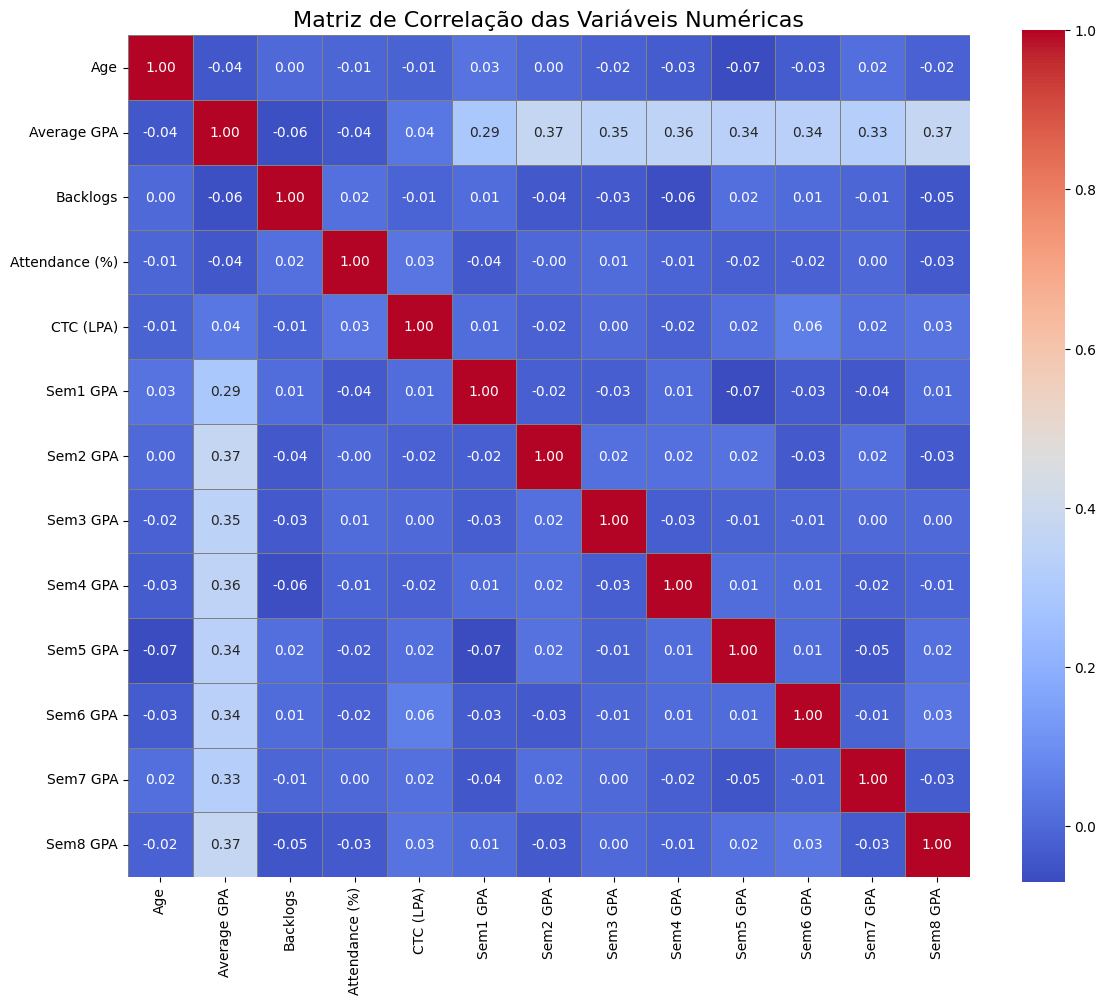

In [67]:
numericas = base1.select_dtypes(include=['float64', 'int64'])

# 2. Gerar matriz de correlação
corr = numericas.corr()

# 3. Plotar heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            square=True, linewidths=0.5, linecolor='gray')

plt.title("Matriz de Correlação das Variáveis Numéricas", fontsize=16)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequência')

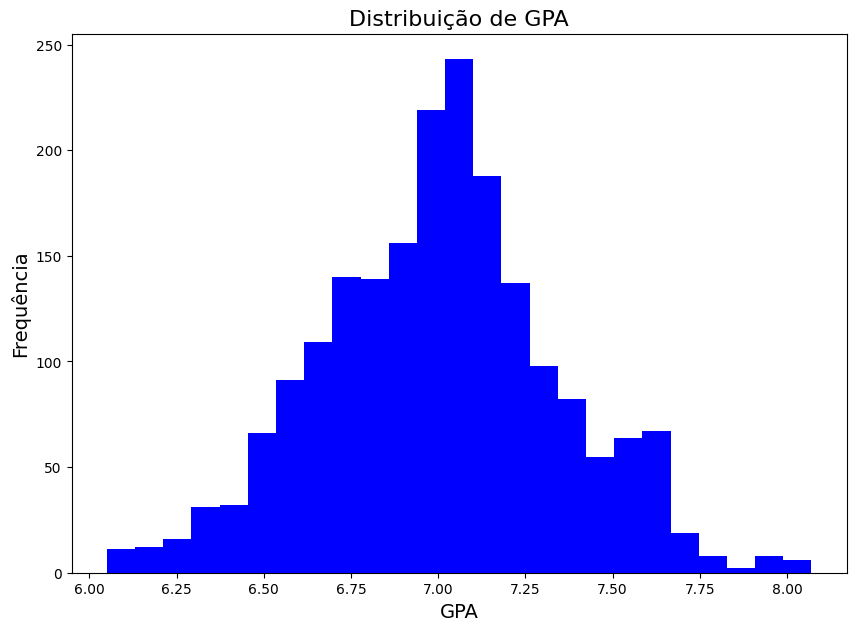

In [47]:
plt.figure(figsize=(10,7))
plt.hist(data=base1, x="Average GPA",
         bins = 25,
         color="blue")
plt.title("Distribuição de GPA", fontsize=16)
plt.xlabel("GPA", fontsize=14)
plt.ylabel("Frequência", fontsize=14)




In [49]:
cursos_maior_gpa = base1.groupby("Branch")["Average GPA"].mean().sort_values(ascending=False)
cursos_maior_gpa

,Average GPA
Branch,
CIVIL,7.049517
MECH,7.021870
IT,7.016725
ECE,7.013003
EEE,6.994332
CSE,6.904349


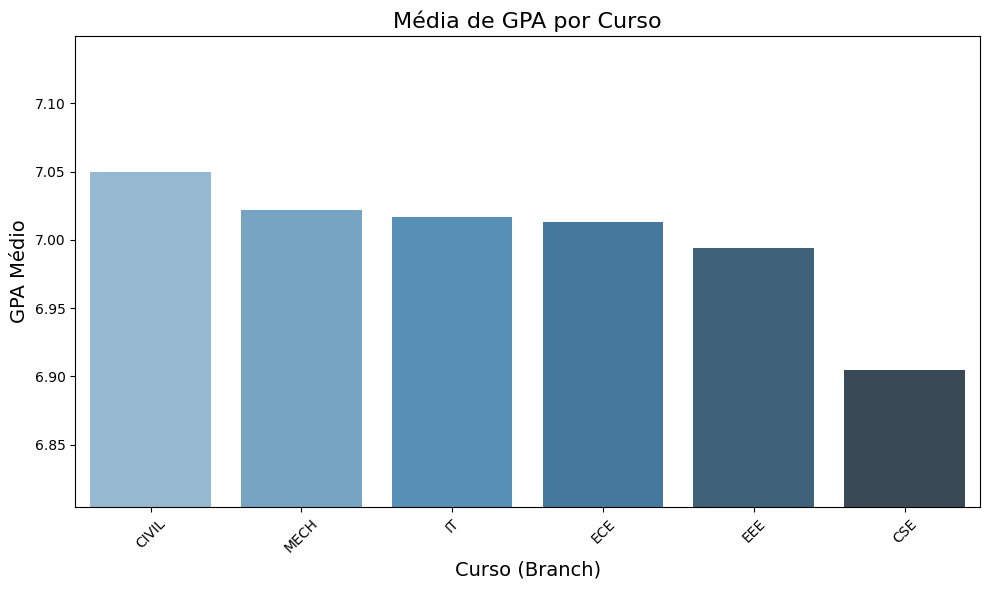

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(x=cursos_maior_gpa.index, y=cursos_maior_gpa.values, palette="Blues_d")

plt.ylim(cursos_maior_gpa.min() - 0.10, cursos_maior_gpa.max() + 0.10)  # zoom no eixo Y

plt.title("Média de GPA por Curso", fontsize=16)
plt.xlabel("Curso (Branch)", fontsize=14)
plt.ylabel("GPA Médio", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
backlogs_por_curso = base1.groupby("Branch")["Backlogs"].mean().sort_values(ascending=False)
print(backlogs_por_curso)


Branch
MECH     1.014164
CSE      0.993151
CIVIL    0.991477
IT       0.976608
ECE      0.959752
EEE      0.866469
Name: Backlogs, dtype: float64


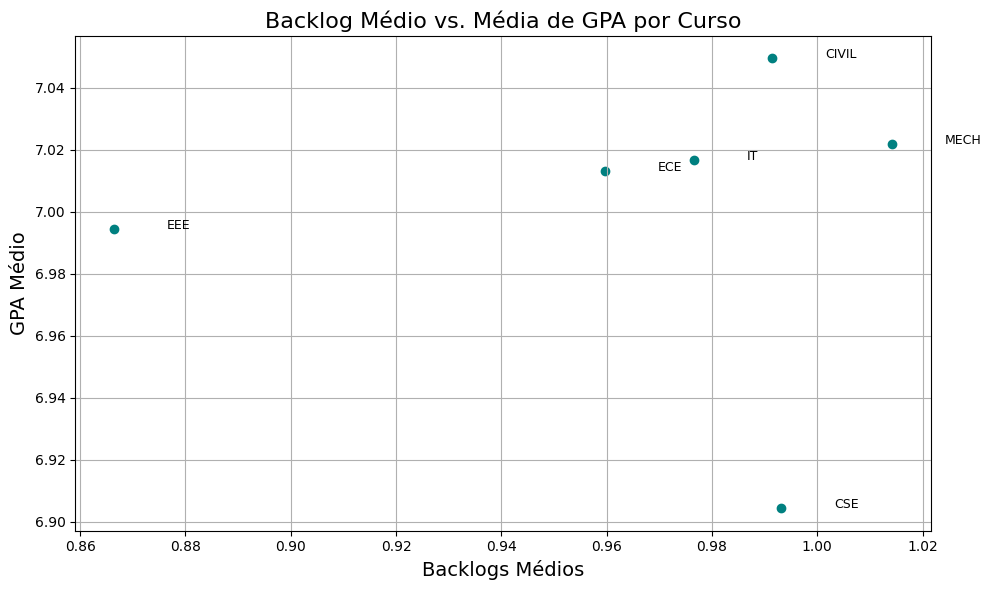

In [54]:
## Baseado nos valores parelhos das médias de GPA, decidi investigar mais a fundo se há alguma relação com a dificuldade do curso através do numero de
##reprovações(backlogs)

media_gpa = base1.groupby("Branch")["Average GPA"].mean()
media_backlog = base1.groupby("Branch")["Backlogs"].mean()

plt.figure(figsize=(10,6))
plt.scatter(media_backlog, media_gpa, color='teal')


for branch in media_gpa.index:
    plt.text(media_backlog[branch]+0.01, media_gpa[branch], branch, fontsize=9)

plt.title("Backlog Médio vs. Média de GPA por Curso", fontsize=16)
plt.xlabel("Backlogs Médios", fontsize=14)
plt.ylabel("GPA Médio", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


##Conclusão da Pergunta 1:

Observa-se que, a paridade academica é extremamente alta e bem distribuida, indicando grande consistência de desempenho em todos os cursos com diferença de GPA de no máximo 0.15 pontos. De todo modo, temos que o curso de Engenharia Civil possui a maior média de GPA com aproximadamente 7.05 pontos, enquanto Ciências da Computação possui a menor média com 6.90 pontos. Além disso, há tendência fraca de correlação negativa em relação a taxa de reprovação dos cursos com o GPA mais baixo.

In [56]:
# Criando faixas de presença
faixas_presenca = pd.cut(base1["Attendance (%)"], bins=[60, 70, 80, 90, 100],
                         labels=["60-70%", "70-80%", "80-90%", "90-100%"])

# Média de GPA por faixa de presença
media_gpa_por_presenca = base1.groupby(faixas_presenca)["Average GPA"].mean()
print(media_gpa_por_presenca)


Attendance (%)
60-70%     7.017214
70-80%     7.011559
80-90%     6.969161
90-100%    7.007668
Name: Average GPA, dtype: float64


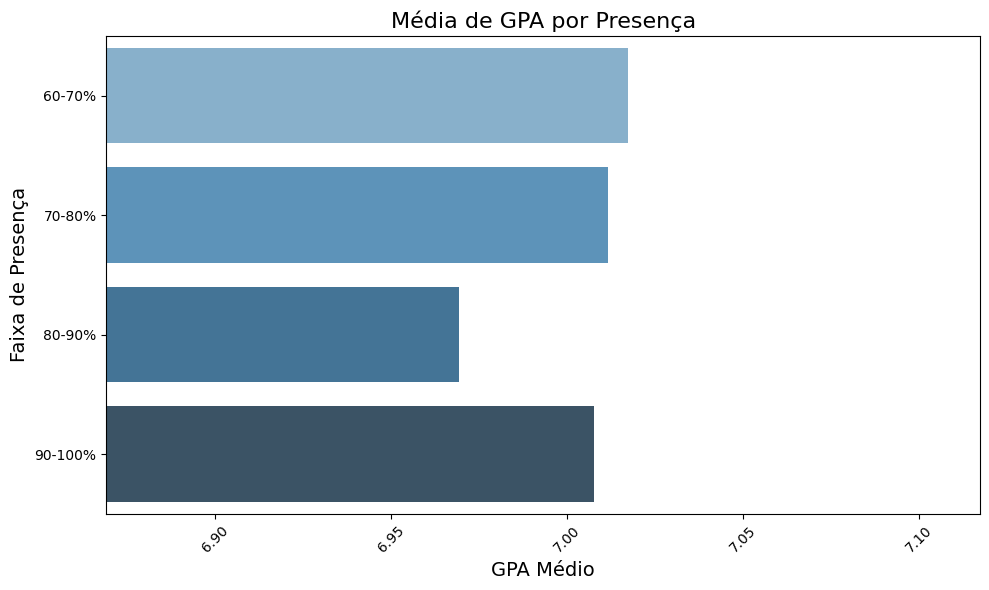

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(x=media_gpa_por_presenca.values, y=media_gpa_por_presenca.index, palette="Blues_d")

plt.title("Média de GPA por Presença", fontsize=16)
plt.xlabel("GPA Médio", fontsize=14)
plt.ylabel("Faixa de Presença", fontsize=14)
plt.xlim(media_gpa_por_presenca.min() - 0.10, media_gpa_por_presenca.max() + 0.10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Attendance (%)', ylabel='Average GPA'>

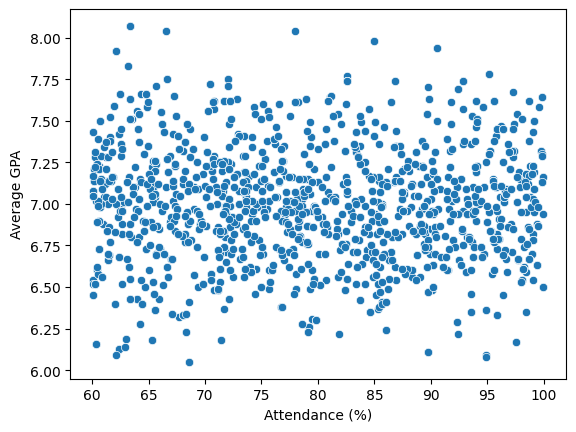

In [68]:
sns.scatterplot(data=base1, x="Attendance (%)", y="Average GPA")


<Axes: xlabel='Sem1 GPA', ylabel='Sem2 GPA'>

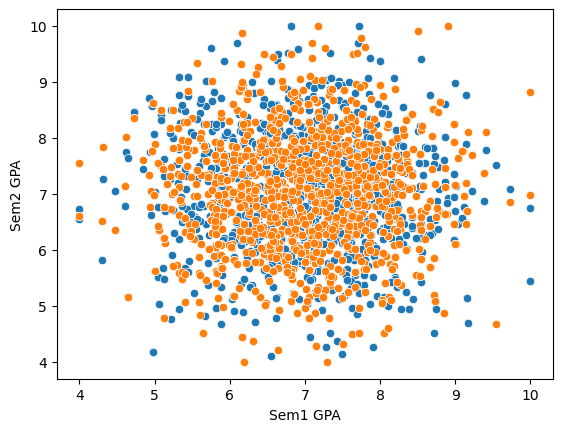

In [69]:
sns.scatterplot(data=base1, x="Sem1 GPA", y="Sem2 GPA")
sns.scatterplot(data=base1, x="Sem1 GPA", y="Sem8 GPA")


##Conclusão da Pergunta 2
Analisando a porcentagem de presença de um aluno é possível concluir que há pouco relação entre esses dois fatores. Além disso, os gráficos de dispersão demonstram que de fato há pouca variação entre as notas dos alunos entre dois semestres distintos, isto é, um aluno que tirou uma boa nota no primeiro semestre tem altas chances de manter a mesma nota no semestre seguinte.



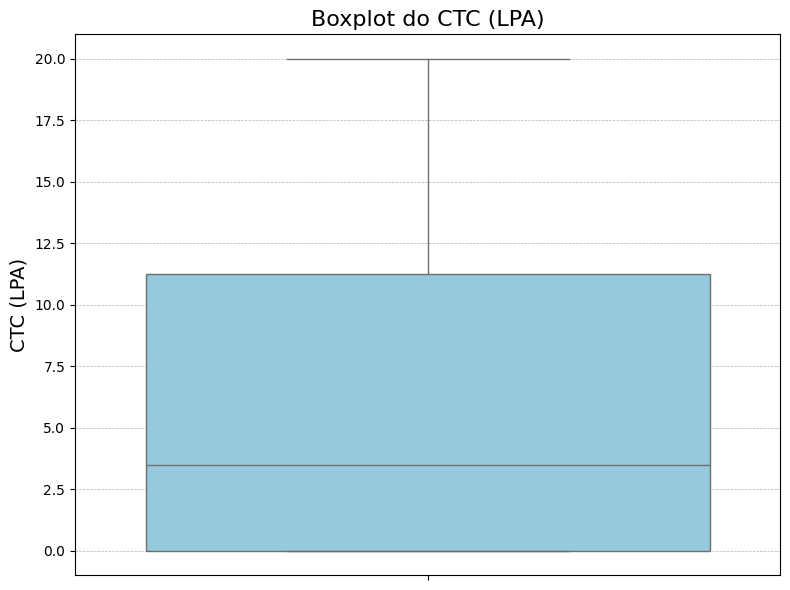

In [76]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    y=base1["CTC (LPA)"],
    color="skyblue"
)

plt.title("Boxplot do CTC (LPA)", fontsize=16)
plt.ylabel("CTC (LPA)", fontsize=14)
plt.grid(True, axis='y', linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()



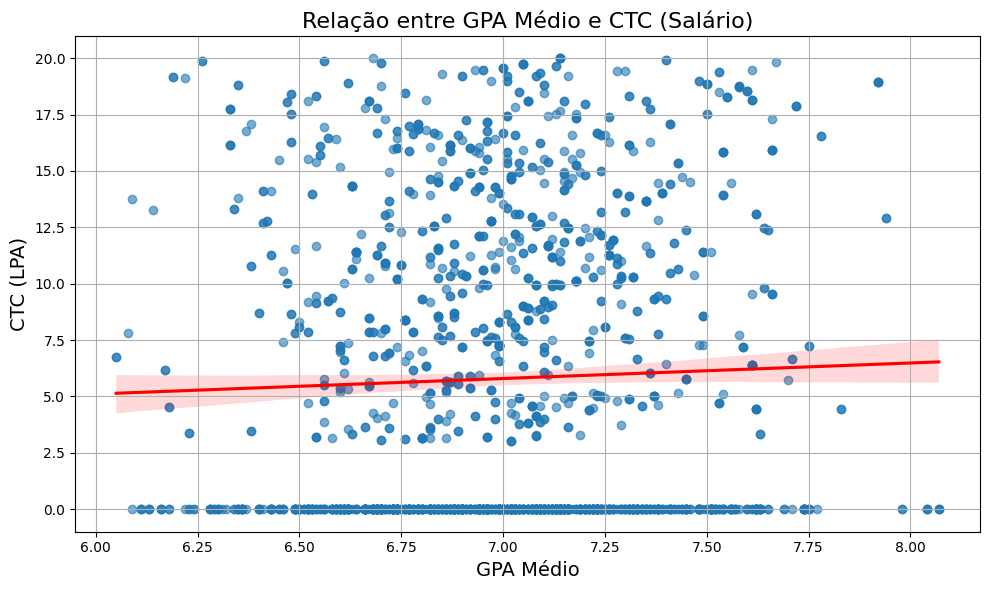

In [72]:
plt.figure(figsize=(10, 6))

sns.regplot(
    data=base1,
    x="Average GPA",
    y="CTC (LPA)",
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"},
    ci=95
)

plt.title("Relação entre GPA Médio e CTC (Salário)", fontsize=16)
plt.xlabel("GPA Médio", fontsize=14)
plt.ylabel("CTC (LPA)", fontsize=14)
plt.xticks()
plt.grid(True)
plt.tight_layout()
plt.show()

Clube
Cultural Club            6.088066
Literary Society         6.025331
Coding Club              5.890822
Robotics                 5.872548
Sports Club              5.753333
Entrepreneurship Cell    5.718958
Name: CTC (LPA), dtype: float64


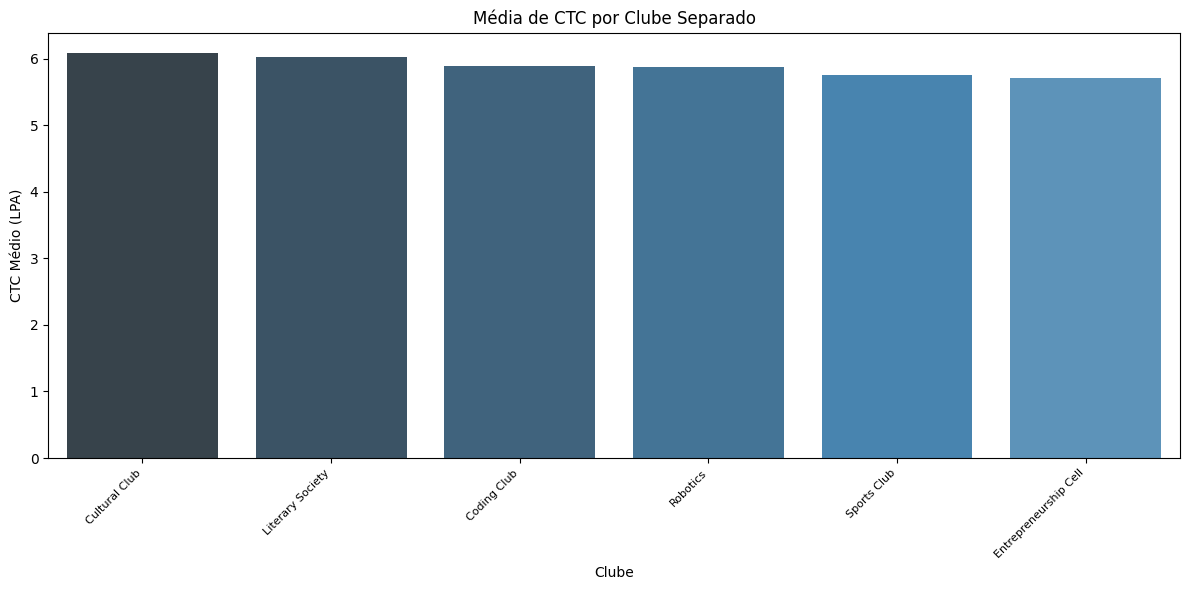

In [102]:
clubes_expandidos = base1.assign(Clube=base1["Clubs"].str.split(",")).explode("Clube") #A coluna de 'Clubs' agrupa diversos valores juntos, neste caso optei por explodir estes dados antes da análise, separando por ','

clubes_expandidos["Clube"] = clubes_expandidos["Clube"].str.strip()
ctc_por_clube = clubes_expandidos.groupby("Clube")["CTC (LPA)"].mean().sort_values(ascending=False).head(15)
print(ctc_por_clube)

plt.figure(figsize=(12,6))

pal = sns.color_palette("Blues_d", n_colors=9)
pal_inv = pal[::-1]

sns.barplot(x=ctc_por_clube.index, y=ctc_por_clube.values, palette=pal_inv)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title("Média de CTC por Clube Separado")
plt.ylabel("CTC Médio (LPA)")
plt.tight_layout()
plt.show()



Clubs
Literary Society, Cultural Club, Coding Club            17.520000
Sports Club, Entrepreneurship Cell, Robotics            16.430000
Coding Club, Cultural Club, Literary Society            15.800000
Robotics, Entrepreneurship Cell, Cultural Club          15.237500
Entrepreneurship Cell, Coding Club, Sports Club         14.883333
Cultural Club, Robotics, Sports Club                    14.170000
Coding Club, Sports Club, Entrepreneurship Cell         14.120000
Entrepreneurship Cell, Coding Club, Literary Society    13.031429
Entrepreneurship Cell, Cultural Club, Coding Club       12.783333
Coding Club, Literary Society, Robotics                 12.570000
Name: CTC (LPA), dtype: float64


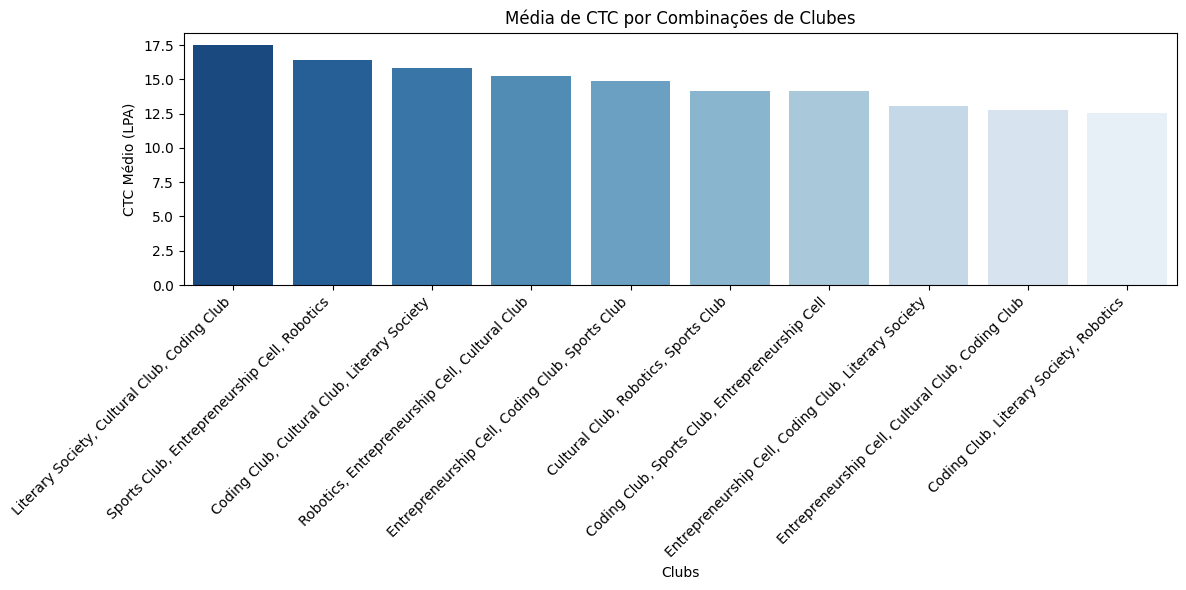

In [111]:
ctc_por_clube = base1.groupby("Clubs")["CTC (LPA)"].mean().sort_values(ascending=False).head(10)
print(ctc_por_clube)

# Visualizar
plt.figure(figsize=(12,6))
sns.barplot(x=ctc_por_clube.index, y=ctc_por_clube.values, palette="Blues_r")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title("Média de CTC por Combinações de Clubes")
plt.ylabel("CTC Médio (LPA)")
plt.tight_layout()
plt.show()



Skill
Java                6.288528
Web Development     5.951625
Python              5.949002
SQL                 5.894824
Data Science        5.872077
Machine Learning    5.765762
C++                 5.501492
Name: CTC (LPA), dtype: float64


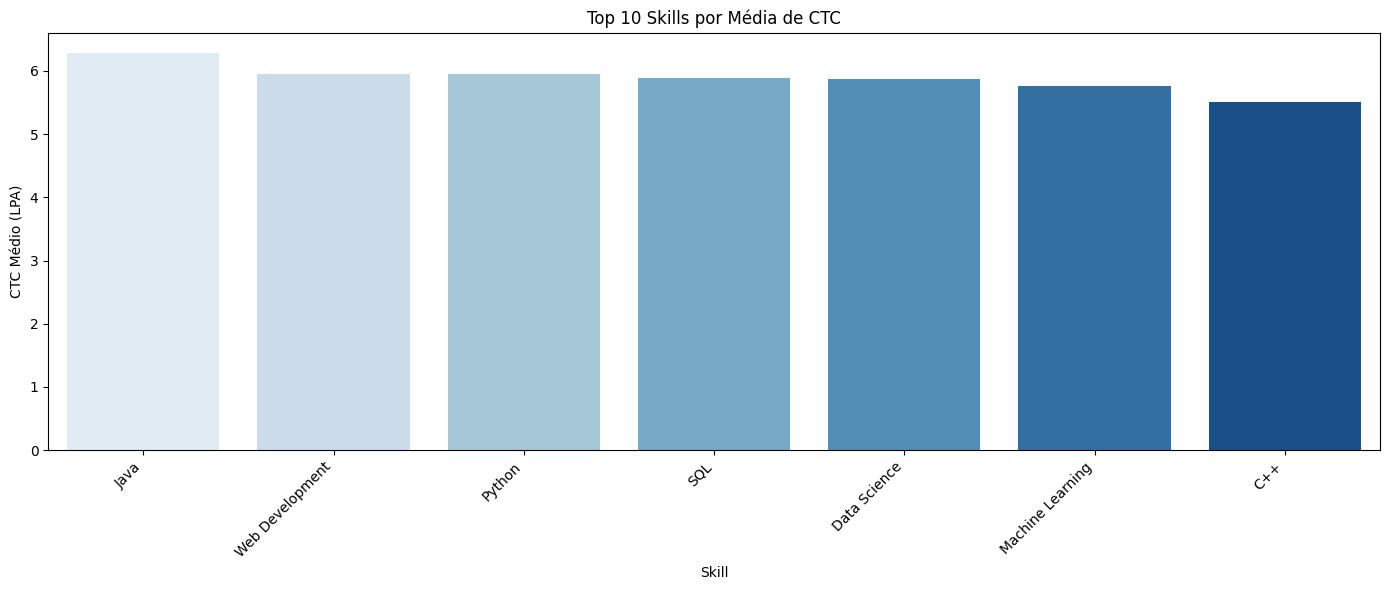

In [115]:
skills_expandidas = base1.assign(Skill=base1["Skills"].str.split(",")).explode("Skill")#A coluna de 'Skills' agrupa diversos valores juntos, neste caso optei por explodir estes dados antes da análise, separando por ','
skills_expandidas["Skill"] = skills_expandidas["Skill"].str.strip()# Remover espaços extras

ctc_por_skill = skills_expandidas.groupby("Skill")["CTC (LPA)"].mean().sort_values(ascending=False).head(10)
print(ctc_por_skill)
plt.figure(figsize=(14,6))
sns.barplot(x=ctc_por_skill.index, y=ctc_por_skill.values, palette="Blues")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title("Top 10 Skills por Média de CTC")
plt.ylabel("CTC Médio (LPA)")
plt.tight_layout()
plt.show()



Skills
Data Science, Python, Web Development, Machine Learning, Java    19.99
Data Science, Web Development, C++, Machine Learning             19.89
C++, SQL, Data Science, Java, Machine Learning                   19.86
C++, Data Science, Machine Learning, Web Development             19.73
Web Development, Machine Learning, Python, Java, Data Science    19.64
Java, Machine Learning, SQL, Data Science, Python                19.32
C++, Data Science, Java, Python, Web Development                 19.30
Java, C++, Python                                                19.20
C++, Web Development, SQL, Data Science, Python                  19.20
Python, C++, Data Science, Java                                  18.99
Name: CTC (LPA), dtype: float64


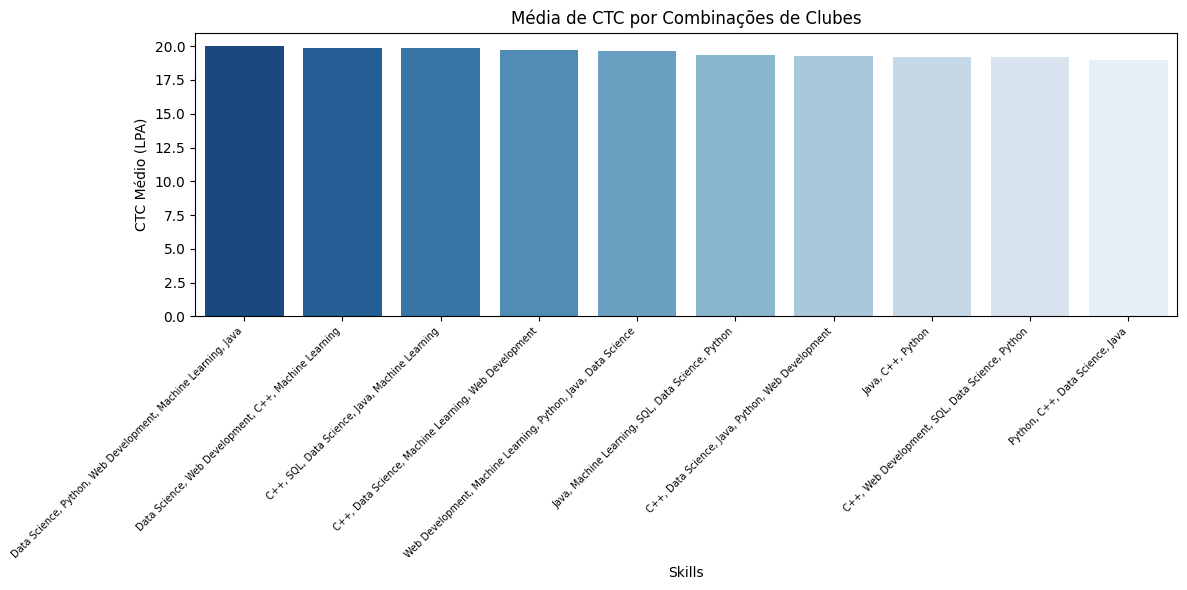

In [116]:
conjunto_skills = base1.groupby("Skills")["CTC (LPA)"].mean().sort_values(ascending=False).head(10)
print(conjunto_skills)

# Visualizar
plt.figure(figsize=(12,6))
sns.barplot(x=conjunto_skills.index, y=conjunto_skills, palette="Blues_r")
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.title("Média de CTC por Combinações de Clubes")
plt.ylabel("CTC Médio (LPA)")
plt.tight_layout()
plt.show()

##Conclusão Pergunta 3

Ao realizar o boxplot dos valores de CTC, podemos notar que 50% dos estudantes possuem um CTC entre 0 e 12,5 LPA, ou seja, estão classificados entre “ruim” e “bom” segundo a escala adotada. Não foram identificados outliers significativos nesse conjunto de dados.

Para confirmar a hipótese de que o GPA estaria diretamente relacionado ao CTC, optei por criar um gráfico de dispersão entre essas variáveis. Contudo, conforme observado, a correlação entre GPA e CTC é baixa, indicando pouca conexão direta.

Diante disso, comecei a analisar se outros fatores poderiam influenciar o CTC, como a participação em clubes acadêmicos e as Hard Skills desenvolvidas ao longo da graduação. Observou-se que, ao considerar apenas um clube ou uma única hard skill isoladamente, o CTC máximo encontrado é de aproximadamente 6 LPA, classificado como “ruim”.

Por isso, decidi avaliar combinações desses fatores para entender seu impacto no CTC. As combinações de clubes e hard skills associadas aos maiores valores médios de CTC foram, respectivamente:

Clubes: Literary Society, Cultural Club, Coding Club — CTC médio de 17,52 LPA

Hard Skills: Data Science, Python, Web Development, Machine Learning, Java — CTC médio de 19,99 LPA

Esses resultados sugerem que a combinação de múltiplas habilidades técnicas e envolvimento em diversos clubes pode estar mais relacionada a um maior retorno salarial, do que o desempenho acadêmico isolado.



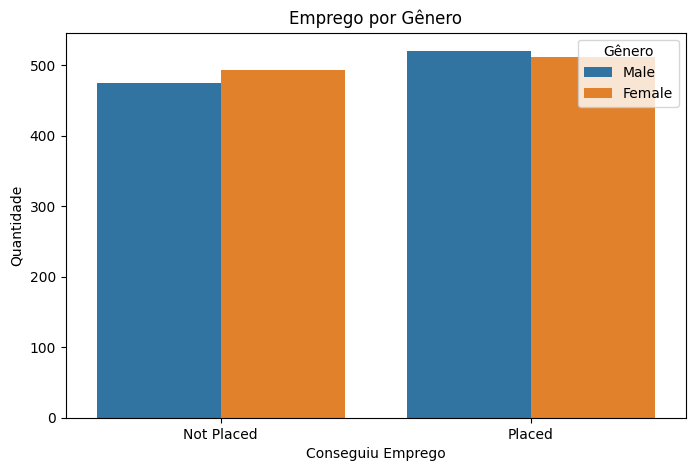

In [118]:
plt.figure(figsize=(8,5))
sns.countplot(x="Placement Status", hue="Gender", data=base1)
plt.title("Emprego por Gênero")
plt.xlabel("Conseguiu Emprego")
plt.ylabel("Quantidade")
plt.legend(title="Gênero")
plt.show()


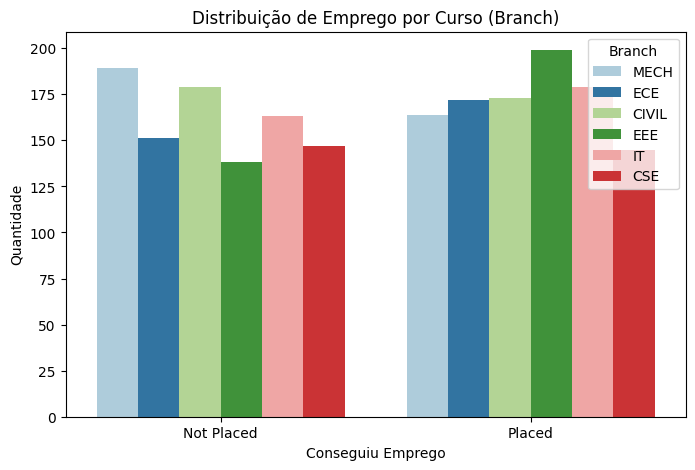

In [131]:
plt.figure(figsize=(8,5))
sns.countplot(x="Placement Status", hue="Branch", data=base1, palette="Paired")
plt.title("Distribuição de Emprego por Curso (Branch)")
plt.xlabel("Conseguiu Emprego")
plt.ylabel("Quantidade")
plt.show()


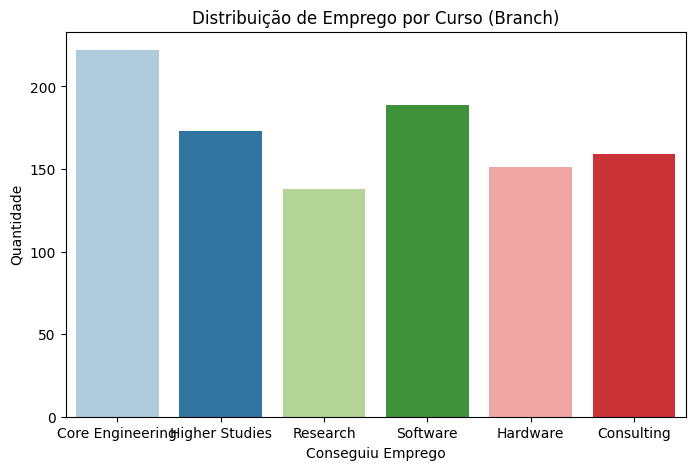

In [135]:
plt.figure(figsize=(8,5))
sns.countplot(x="Placement Domain",data=base1, palette="Paired")
plt.title("Distribuição de Emprego por Curso (Branch)")
plt.xlabel("Conseguiu Emprego")
plt.ylabel("Quantidade")
plt.show()


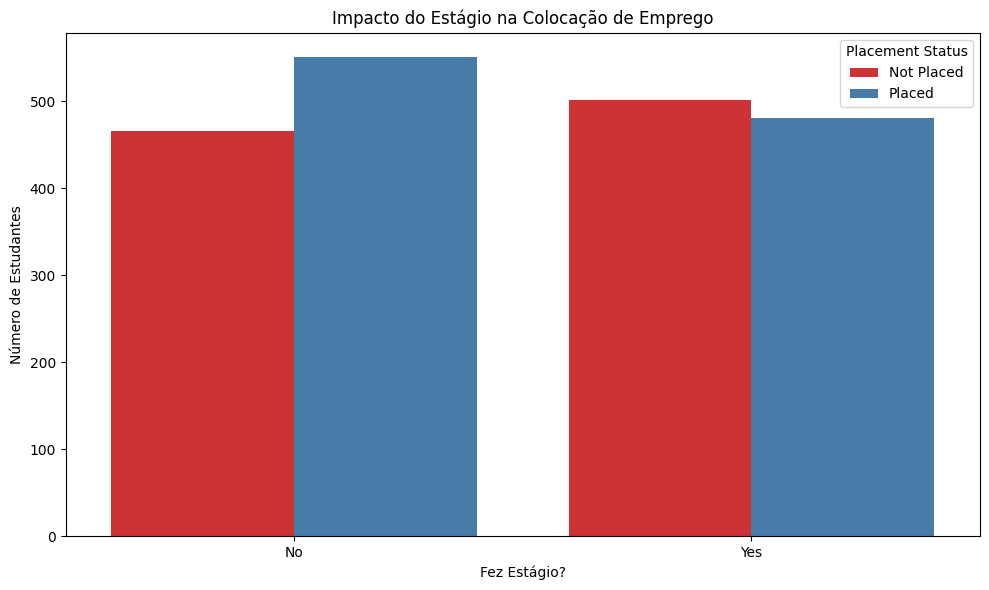

In [136]:
# Criar um DataFrame com contagem para combinação de Estágio e Emprego
df_estagio_emprego = base1.groupby(["Internship Done", "Placement Status"]).size().reset_index(name='count')

# Plotar um gráfico de barras empilhadas
plt.figure(figsize=(10,6))
sns.barplot(x="Internship Done", y="count", hue="Placement Status", data=df_estagio_emprego, palette="Set1")

plt.title("Impacto do Estágio na Colocação de Emprego")
plt.ylabel("Número de Estudantes")
plt.xlabel("Fez Estágio?")
plt.tight_layout()
plt.show()


##Conclusão sobre a pergunta 4
Por fim, ao analisar possíveis relações que podem levar a não empregabilidade dos estudantes recém formados, houve uma distribuição bem simétrica dos valores, não houve distinção de idade, gênero ou realização do estágio. No entanto, quanto as pessoas que conseguiram emprego, foi possível observar uma tendência de maior taxa de sucesso em áreas de trabalho ligadas a software e engenharia fundamental. Além disso, alunos do curso de Engenharia Elétrica e IT tiveram maiores resultados ao obter emprego em comparação com os demais cursos

## Conclusão

Apesar de pequenas variações entre os cursos, o desempenho acadêmico (GPA) é bem distribuído, com a Engenharia Civil apresentando a maior média e Ciências da Computação a menor. A presença nas aulas demonstrou ter pouca relação com o GPA, e o desempenho entre semestres é consistente.

Não foi identificada correlação significativa entre GPA e salário (CTC). Em vez disso, a combinação de múltiplas hard skills (como Python, Machine Learning e Java) e participação em diversos clubes extracurriculares demonstrou forte relação com maiores salários, indicando que essas experiências têm maior impacto no sucesso profissional do que o desempenho acadêmico isolado.

Quanto à empregabilidade, aproximadamente metade dos alunos conseguiu emprego após a graduação, sem correlação clara com idade, gênero ou estágio. No entanto, os que atuaram em áreas de software ou engenharia fundamental, especialmente vindos dos cursos de Engenharia Elétrica e IT, apresentaram maior taxa de inserção no mercado.
